In [170]:
import numpy as np
from numpy import ndarray
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [171]:
df = pd.read_csv("mnist.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [172]:
X = df.drop(columns = [784])
y = df[784]

In [173]:
img_arr = X.iloc[np.random.randint(len(X))].values
img_arr = img_arr.reshape((28, 28))

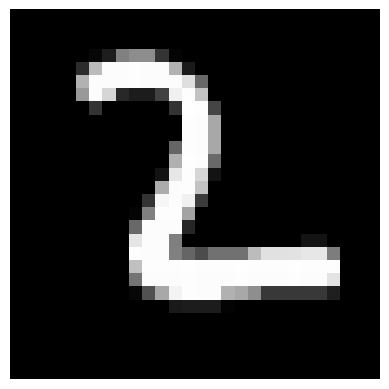

In [174]:
plt.imshow(img_arr, cmap="gray")
plt.axis("off")
plt.show()

In [175]:
def pad_2d(image_arr: ndarray, kernel_size):
    N, M = image_arr.shape
    m, n = kernel_size
    
    n_rows = int((m - 1) / 2)
    n_cols = int((n - 1) / 2)
    
    # add top and bottom padding
    top_bottom_zeros = np.zeros((n_rows, M))
    image_arr = np.vstack([top_bottom_zeros, image_arr, top_bottom_zeros])
    
    # add left and right padding
    left_bottom_zeros = np.zeros((N + n_rows * 2, n_cols)) # (m - 1) rows need to be added
    image_arr = np.hstack([left_bottom_zeros, image_arr, left_bottom_zeros])
    
    image_arr = image_arr.astype('uint64')
    
    return image_arr

In [176]:
def inner_product(a: ndarray, b: ndarray):
    return np.sum(a * b)

In [177]:
def conv_2d(inp: ndarray, kernel: ndarray, pad: bool=False) -> ndarray:
    
    inp_pad = inp
    # initialize the output
    out = np.zeros((inp.shape[0] - kernel.shape[0] + 1, inp.shape[1] - kernel.shape[1] + 1))
    
    if pad:
        # pad the image
        inp_pad = pad_2d(inp, kernel.shape)
        out = np.zeros_like(inp)
    
    # flip the kernel horizontally and vertically
    kernel = np.flipud(np.fliplr(kernel))
    
    # convolution process
    for i in range(inp_pad.shape[0] - kernel.shape[0] + 1):
        for j in range(inp_pad.shape[1] - kernel.shape[1] + 1):
            sub_arr = inp_pad[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            out[i, j] = inner_product(sub_arr, kernel)
    
    return out

In [178]:
def activation(arr: ndarray, act_fun: str):
    def relu(x):
        return max(0, x)
    
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
        
    
    # Apply the function on the array using np.vectorize()
    if act_fun == "relu":
        activaiton_function = np.vectorize(relu)
    elif act_fun == "sigmoid":
        activaiton_function = np.vectorize(sigmoid)
    
    result_array = activaiton_function(arr)
    
    return result_array

In [179]:
def maxpooling_2d(arr: ndarray, pool_size: int, stride: int):
    out = []
    for i in tqdm(range(0, arr.shape[0] - pool_size + 1, stride)):
        h = []
        for j in range(0, arr.shape[1] - pool_size + 1, stride):
            sub_arr = arr[i:i + pool_size, j:j + pool_size]
            h.append(np.max(sub_arr))
        out.append(h)
    return np.array(out)

In [180]:
def show_image(inp: ndarray):
    plt.imshow(inp, cmap="gray")
    plt.axis("off")
    plt.show()

# Feature Extraction

## Layer 1

In [221]:
k_size_1 = 5

kernels_1 = np.random.randn(2, k_size_1, k_size_1)
biases_1 = np.random.randn(2)

### Convolution

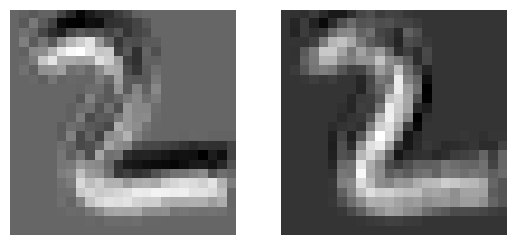

In [222]:
filtered_images_1 = [] 

for k, b in zip(kernels_1, biases_1):
    filtered_images_1.append(conv_2d(img_arr, k) + b)
    
filtered_images_1 = np.array(filtered_images_1)


for i, f_img in enumerate(filtered_images_1):
    plt.subplot(1, 2, i + 1)
    plt.imshow(f_img, cmap="gray")
    plt.axis("off")

plt.show()

In [223]:
filtered_images_1.shape

(2, 24, 24)

### Activation function

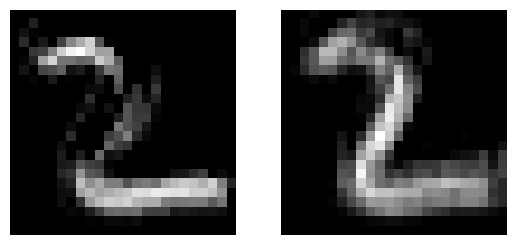

In [224]:
# using activation function
act_results_1 = np.array([activation(f_img, "relu") for f_img in filtered_images_1])

for i, f_img in enumerate(act_results_1):
    plt.subplot(1, 2, i + 1)
    plt.imshow(f_img, cmap="gray")
    plt.axis("off")

plt.show()

### Max Pooling

100%|████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1718.33it/s]


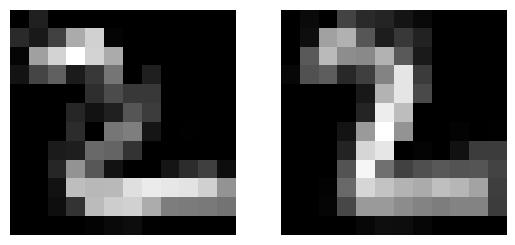

In [225]:
pool_size_1 = 2
stride_1 = 2

max_pooled_results_1 = np.array([maxpooling_2d(f_img, pool_size_1, stride_1) for f_img in act_results_1])

for i, f_img in enumerate(max_pooled_results_1):
    plt.subplot(1, 2, i + 1)
    plt.imshow(f_img, cmap="gray")
    plt.axis("off")

plt.show()

In [226]:
max_pooled_results_1.shape

(2, 12, 12)

---
## Layer 2

In [228]:
n_of_kernels = 4
k_size_2 = 3
prev_output_len = len(max_pooled_results_1)

kernels_2 = np.random.randn(n_of_kernels, prev_output_len, k_size_2, k_size_2)
biases_2 = np.random.randn(prev_output_len)

### Convolution

In [233]:
filtered_images_2 = []

for ks, b in zip(kernels, biases):
    r = []
    for k, layer in zip(ks, out_layer_1):
        r.append(conv_2d(layer, k))
    filtered_images_2.append(np.sum(r, axis=0) + b)

filtered_images_2 = np.array(filtered_images_2)

In [234]:
filtered_images_2.shape

(4, 10, 10)

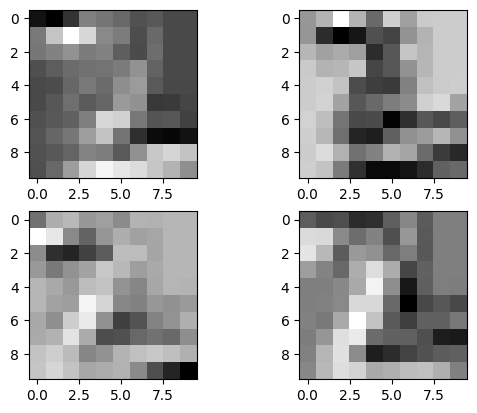

In [235]:
for i, f_image in enumerate(filtered_images_2):
    plt.subplot(2, 2, i + 1)
    plt.imshow(f_image, cmap="gray")
plt.show()

### Activation: Sigmoid

C:\Users\imsub\AppData\Local\Temp\ipykernel_13264\3171295861.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


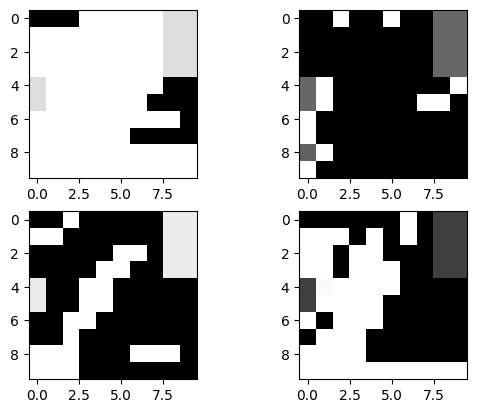

In [237]:
act_results_2 = np.array([activation(f_img, "sigmoid") for f_img in results])

for i, f_image in enumerate(act_results_2):
    plt.subplot(2, 2, i + 1)
    plt.imshow(f_image, cmap="gray")
    
plt.show()

### Max Pooling

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1678.80it/s]


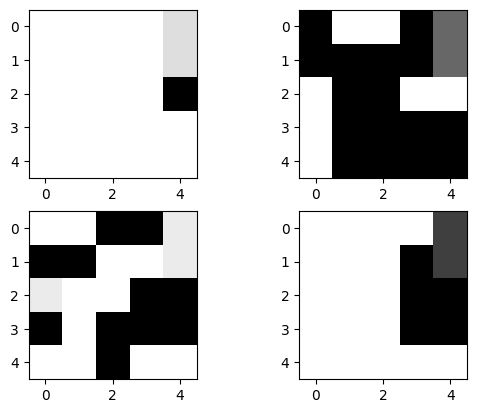

In [238]:
pool_size_2 = 2
stride_2 = 2

max_pooled_results_2 = np.array([maxpooling_2d(f_image, pool_size_2, stride_2) for f_image in act_results])

for i, f_image in enumerate(max_pooled_results_2):
    plt.subplot(2, 2, i + 1)
    plt.imshow(f_image, cmap="gray")
plt.show()

In [239]:
max_pooled_results_2.shape

(4, 5, 5)

In [240]:
output = max_pooled_results.flatten()
output.shape

(100,)

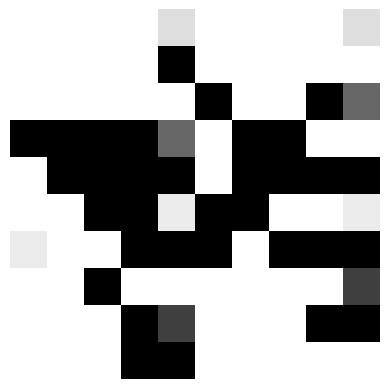

In [259]:
# plt.figure(figsize=(14, 10))
plt.imshow(layer_out_2.reshape(10, 10), cmap="gray")
plt.axis("off")
plt.show()

In [260]:
plt.figure(figsize=(14, 10))
plt.imshow(layer_out_2.reshape(1, 100), cmap="gray")
plt.axis("off")
plt.show()

---
## This layer will be fed into the fully connected layers to learn the neural network